In [1]:
# import libraries
import keras
import pandas as pd
import numpy as np
import theano as th
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)



import warnings
warnings.filterwarnings('ignore', category = DeprecationWarning)
warnings.filterwarnings('ignore', category = FutureWarning)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\ProgramData\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (thean

In [2]:
# load Dataset
data = pd.read_csv('Churn_Modelling.csv', index_col= 1)
data.drop(['RowNumber','Surname'], axis = 1, inplace =True)

data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Data Wrangling

In [3]:
data.shape

(10000, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB


In [5]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [6]:
data = pd.get_dummies(data = data,columns =  ['Geography','Gender'], drop_first = True, dtype = float)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
CreditScore          10000 non-null int64
Age                  10000 non-null int64
Tenure               10000 non-null int64
Balance              10000 non-null float64
NumOfProducts        10000 non-null int64
HasCrCard            10000 non-null int64
IsActiveMember       10000 non-null int64
EstimatedSalary      10000 non-null float64
Exited               10000 non-null int64
Geography_Germany    10000 non-null float64
Geography_Spain      10000 non-null float64
Gender_Male          10000 non-null float64
dtypes: float64(5), int64(7)
memory usage: 1015.6 KB


In [8]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.250900,0.247700,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.433553,0.431698,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,0.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


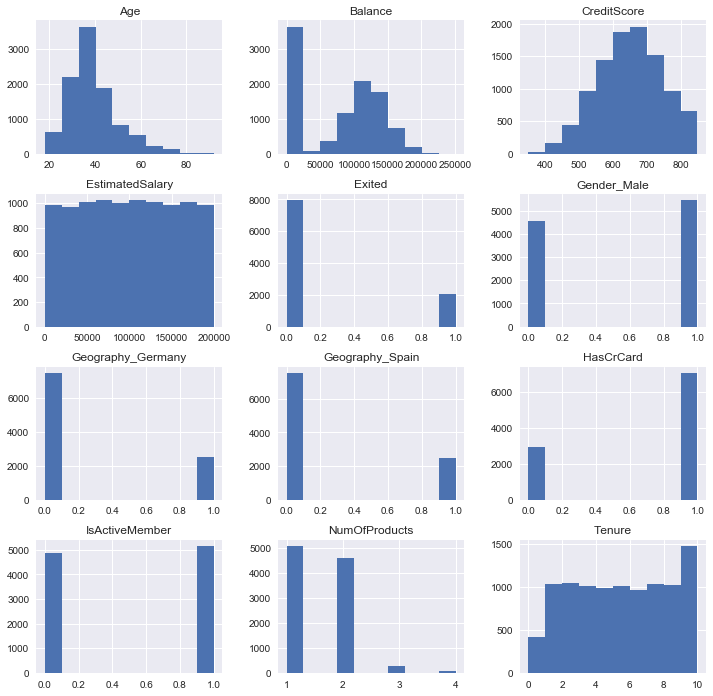

In [9]:
data.hist(figsize = (12,12))
plt.show()

* Data is skewwd.
* Class is imbalanced.

In [10]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [11]:
data['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


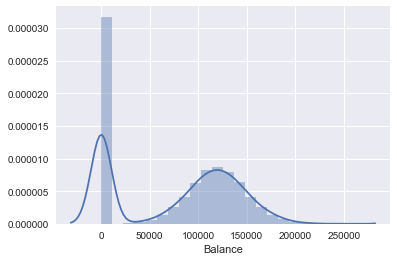

In [12]:

sns.distplot(data['Balance'])

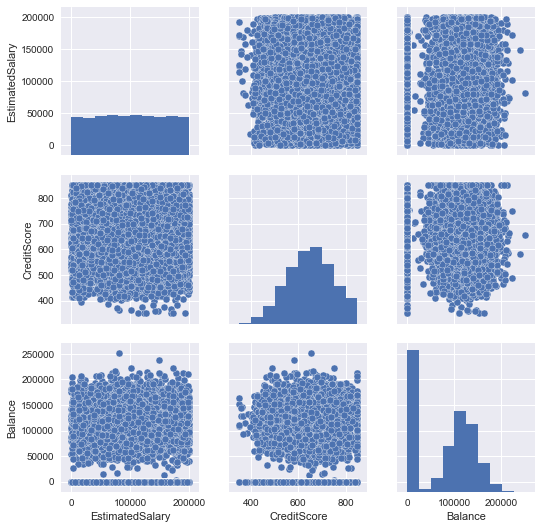

In [13]:
col = ['EstimatedSalary', 'CreditScore','Balance']
sns.pairplot(data[col])

In [14]:
X = data.drop('Exited',axis = 1)
y = data['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [15]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8000, 11), (8000,), (2000, 11), (2000,))

In [16]:
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.fit_transform(X_test)

#### Part 2 - Now let's make the ANN!


In [17]:
from keras.models import Sequential
from keras.layers import Dense

In [18]:
# initialize the ANN
classifier = Sequential()

# adding input layer and first hidden layer
classifier.add(Dense(units = 6, input_dim = 11, activation = 'relu', kernel_initializer = 'uniform'))

# add second hidden layer
classifier.add(Dense(units = 6, activation = 'relu', kernel_initializer = 'uniform'))

# add output layer
classifier.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer = 'uniform'))

# if dependent variable has more than 2 categories, then change activation to softmax in output layer and 
#out_dim to no of classes

# compile the ANN( running gradient descent to adjust weight, that means compiling the ANN)
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'] )

# fit training data to ANN
classifier.fit(X_train, y_train, batch_size= 10, epochs = 100)


Epoch 1/100
8000/8000 [==============================] - 2s 188us/step - loss: 0.4808 - acc: 0.7941
Epoch 2/100
8000/8000 [==============================] - 1s 131us/step - loss: 0.4316 - acc: 0.7945
Epoch 3/100
8000/8000 [==============================] - 1s 131us/step - loss: 0.4258 - acc: 0.7945
Epoch 4/100
8000/8000 [==============================] - 1s 130us/step - loss: 0.4213 - acc: 0.8197
Epoch 5/100
8000/8000 [==============================] - 1s 134us/step - loss: 0.4185 - acc: 0.8271
Epoch 6/100
8000/8000 [==============================] - 1s 135us/step - loss: 0.4165 - acc: 0.8305
Epoch 7/100
8000/8000 [==============================] - 1s 137us/step - loss: 0.4147 - acc: 0.8336
Epoch 8/100
8000/8000 [==============================] - 1s 151us/step - loss: 0.4134 - acc: 0.8327
Epoch 9/100
8000/8000 [==============================] - 1s 143us/step - loss: 0.4123 - acc: 0.8335
Epoch 10/100
8000/8000 [==============================] - 1s 138us/step - loss: 0.4113 - acc: 0.8335

8000/8000 [==============================] - 1s 159us/step - loss: 0.4033 - acc: 0.8342
Epoch 83/100
8000/8000 [==============================] - 1s 145us/step - loss: 0.4030 - acc: 0.8342
Epoch 84/100
8000/8000 [==============================] - 1s 140us/step - loss: 0.4030 - acc: 0.8354
Epoch 85/100
8000/8000 [==============================] - 1s 159us/step - loss: 0.4029 - acc: 0.8345
Epoch 86/100
8000/8000 [==============================] - 1s 147us/step - loss: 0.4029 - acc: 0.8330
Epoch 87/100
8000/8000 [==============================] - 1s 138us/step - loss: 0.4026 - acc: 0.8340
Epoch 88/100
8000/8000 [==============================] - 1s 140us/step - loss: 0.4032 - acc: 0.8357
Epoch 89/100
8000/8000 [==============================] - 1s 145us/step - loss: 0.4032 - acc: 0.8347
Epoch 90/100
8000/8000 [==============================] - 1s 135us/step - loss: 0.4028 - acc: 0.8346
Epoch 91/100
8000/8000 [==============================] - 1s 142us/step - loss: 0.4029 - acc: 0.8356
Epo

loss = categorical_crossentropy for more than 2 classes

units is output dimension that is number of neurons in output layer like input layer is first layer, for this input layer, first hidden layer is o/p layer, so need to decide no of neurons for this layer.

Trick: take no of neurons equal to average of input layer( where we feed dataset) and final output layer. so 11 + 1 = 12/2 6

In [19]:
# predictions
predictions = classifier.predict(X_test)
predictions = (predictions > 0.5)

# confusion metric evaluation
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

In [20]:
cm

array([[1553,   54],
       [ 262,  131]], dtype=int64)

In [21]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, predictions)
score

0.842

In [36]:
new_data = np.array([[600.0, 40, 3, 60000.0, 2, 1, 1, 50000, 0, 0, 0]])
new_data = std.fit_transform(new_data)
new_pred = classifier.predict(new_data)
new_pred = (new_pred > 0.5)

In [37]:
new_pred

array([[False]])